### Objective 

The main goal of this Data Analysis using sql would be identify opportunities to increase occupancy rate on low performing flight. 
which can be ultimately lead  to increases profitability for the Airline.

#### 1. Increase occupancy rate:
By increasing the occupancy rate, we can
boost the average profit earned per seat and mitigate the impact of the challenges we're facing.
#### 2.Improve pricing strategy: 
We need to develop a pricing strategy that
takes into account the changing market conditions and customer preferences to attract and retain customers.
#### 3.Enhance customer experience:
We need to focus on providing a seamless and convenient experience for our customers, from booking to arrival, to differentiate ourselves in a highly competitive industry and increase customer loyalty.

The end goal of this task would be to identify opportunities to increase the occupancy rate on low-performing flights, which can ultimately lead to increased profitability for the airline.

### Import Libraries

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Database Connection

In [2]:
connection = sqlite3.connect('travel.sqlite') # travel.sqlite -> it's a database_name.
cursor = connection.cursor()  # cursor-> it's used to execute the query

In [3]:
cursor.execute("""select name from sqlite_master where type = 'table';""")
print('List of table present in the database')
table_list = [table[0] for table in cursor.fetchall()]
table_list

List of table present in the database


['aircrafts_data',
 'airports_data',
 'boarding_passes',
 'bookings',
 'flights',
 'seats',
 'ticket_flights',
 'tickets']

### Data Exploration

In [4]:
aircraft_data = pd.read_sql_query('select * from aircrafts_data', connection)
aircraft_data.head()

,aircraft_code,model,range
0,773,"{""en"": ""Boeing 777-300"", ""ru"": ""Боинг 777-300""}",11100
1,763,"{""en"": ""Boeing 767-300"", ""ru"": ""Боинг 767-300""}",7900
2,SU9,"{""en"": ""Sukhoi Superjet-100"", ""ru"": ""Сухой Суп...",3000
3,320,"{""en"": ""Airbus A320-200"", ""ru"": ""Аэробус A320-...",5700
4,321,"{""en"": ""Airbus A321-200"", ""ru"": ""Аэробус A321-...",5600


In [5]:
airports_data = pd.read_sql_query('select * from airports_data', connection)
airports_data.head()

,airport_code,airport_name,city,coordinates,timezone
0,YKS,"{""en"": ""Yakutsk Airport"", ""ru"": ""Якутск""}","{""en"": ""Yakutsk"", ""ru"": ""Якутск""}","(129.77099609375,62.0932998657226562)",Asia/Yakutsk
1,MJZ,"{""en"": ""Mirny Airport"", ""ru"": ""Мирный""}","{""en"": ""Mirnyj"", ""ru"": ""Мирный""}","(114.03900146484375,62.534698486328125)",Asia/Yakutsk
2,KHV,"{""en"": ""Khabarovsk-Novy Airport"", ""ru"": ""Хабар...","{""en"": ""Khabarovsk"", ""ru"": ""Хабаровск""}","(135.18800354004,48.5279998779300001)",Asia/Vladivostok
3,PKC,"{""en"": ""Yelizovo Airport"", ""ru"": ""Елизово""}","{""en"": ""Petropavlovsk"", ""ru"": ""Петропавловск-К...","(158.453994750976562,53.1679000854492188)",Asia/Kamchatka
4,UUS,"{""en"": ""Yuzhno-Sakhalinsk Airport"", ""ru"": ""Хом...","{""en"": ""Yuzhno-Sakhalinsk"", ""ru"": ""Южно-Сахали...","(142.718002319335938,46.8886985778808594)",Asia/Sakhalin


In [6]:
airports_data.shape

(104, 5)

In [7]:
boarding_passes = pd.read_sql_query('SELECT * FROM boarding_passes', connection)
boarding_passes.head()

,ticket_no,flight_id,boarding_no,seat_no
0,0005435212351,30625,1,2D
1,0005435212386,30625,2,3G
2,0005435212381,30625,3,4H
3,0005432211370,30625,4,5D
4,0005435212357,30625,5,11A


In [8]:
boarding_passes.shape

(579686, 4)

In [9]:
bookings = pd.read_sql_query('select * from bookings', connection)
bookings.head()

,book_ref,book_date,total_amount
0,00000F,2017-07-05 03:12:00+03,265700
1,000012,2017-07-14 09:02:00+03,37900
2,000068,2017-08-15 14:27:00+03,18100
3,000181,2017-08-10 13:28:00+03,131800
4,0002D8,2017-08-07 21:40:00+03,23600


In [10]:
bookings.shape

(262788, 3)

In [11]:
flights = pd.read_sql_query("SELECT * FROM flights", connection)
flights.head()

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
0,1185,PG0134,2017-09-10 09:50:00+03,2017-09-10 14:55:00+03,DME,BTK,Scheduled,319,\N,\N
1,3979,PG0052,2017-08-25 14:50:00+03,2017-08-25 17:35:00+03,VKO,HMA,Scheduled,CR2,\N,\N
2,4739,PG0561,2017-09-05 12:30:00+03,2017-09-05 14:15:00+03,VKO,AER,Scheduled,763,\N,\N
3,5502,PG0529,2017-09-12 09:50:00+03,2017-09-12 11:20:00+03,SVO,UFA,Scheduled,763,\N,\N
4,6938,PG0461,2017-09-04 12:25:00+03,2017-09-04 13:20:00+03,SVO,ULV,Scheduled,SU9,\N,\N


In [12]:
seats = pd.read_sql_query('select * from seats', connection)
seats

,aircraft_code,seat_no,fare_conditions
0,319,2A,Business
1,319,2C,Business
2,319,2D,Business
3,319,2F,Business
4,319,3A,Business
...,...,...,...
1334,773,48H,Economy
1335,773,48K,Economy
1336,773,49A,Economy
1337,773,49C,Economy


In [13]:
ticket_flights = pd.read_sql_query('select * from ticket_flights', connection)
ticket_flights.head()

,ticket_no,flight_id,fare_conditions,amount
0,0005432159776,30625,Business,42100
1,0005435212351,30625,Business,42100
2,0005435212386,30625,Business,42100
3,0005435212381,30625,Business,42100
4,0005432211370,30625,Business,42100


In [14]:
ticket_flights.shape

(1045726, 4)

In [15]:
tickets = pd.read_sql_query('select * from tickets', connection)
tickets.head()

,ticket_no,book_ref,passenger_id
0,0005432000987,06B046,8149 604011
1,0005432000988,06B046,8499 420203
2,0005432000989,E170C3,1011 752484
3,0005432000990,E170C3,4849 400049
4,0005432000991,F313DD,6615 976589


### Extract Column Information & Datatypes in All table

In [16]:
for table in table_list:
    print("\ntable",table)
    column_info = connection.execute('PRAGMA table_info({})'.format(table)) # PRAGMA-> it's a sql_query that give the information of table.
    for column in column_info.fetchall():
        print(column[1:3])


table aircrafts_data
('aircraft_code', 'character(3)')
('model', 'jsonb')
('range', 'INTEGER')

table airports_data
('airport_code', 'character(3)')
('airport_name', 'jsonb')
('city', 'jsonb')
('coordinates', 'point')
('timezone', 'TEXT')

table boarding_passes
('ticket_no', 'character(13)')
('flight_id', 'INTEGER')
('boarding_no', 'INTEGER')
('seat_no', 'character varying(4)')

table bookings
('book_ref', 'character(6)')
('book_date', 'timestamp with time zone')
('total_amount', 'numeric(10,2)')

table flights
('flight_id', 'INTEGER')
('flight_no', 'character(6)')
('scheduled_departure', 'timestamp with time zone')
('scheduled_arrival', 'timestamp with time zone')
('departure_airport', 'character(3)')
('arrival_airport', 'character(3)')
('status', 'character varying(20)')
('aircraft_code', 'character(3)')
('actual_departure', 'timestamp with time zone')
('actual_arrival', 'timestamp with time zone')

table seats
('aircraft_code', 'character(3)')
('seat_no', 'character varying(4)')
('

###  Missing Values

In [17]:
for table in table_list:
    print("\ntable",table)
    df_table =pd.read_sql_query(f"Select * from {table}", connection)
    print(df_table.isnull().sum())


table aircrafts_data
aircraft_code    0
model            0
range            0
dtype: int64

table airports_data
airport_code    0
airport_name    0
city            0
coordinates     0
timezone        0
dtype: int64

table boarding_passes
ticket_no      0
flight_id      0
boarding_no    0
seat_no        0
dtype: int64

table bookings
book_ref        0
book_date       0
total_amount    0
dtype: int64

table flights
flight_id              0
flight_no              0
scheduled_departure    0
scheduled_arrival      0
departure_airport      0
arrival_airport        0
status                 0
aircraft_code          0
actual_departure       0
actual_arrival         0
dtype: int64

table seats
aircraft_code      0
seat_no            0
fare_conditions    0
dtype: int64

table ticket_flights
ticket_no          0
flight_id          0
fare_conditions    0
amount             0
dtype: int64

table tickets
ticket_no       0
book_ref        0
passenger_id    0
dtype: int64


### Duplicates Value

In [18]:
for table in table_list:
    print("table", table)
    df_duplicate = pd.read_sql_query(f"select * from {table}", connection)
    print(df_duplicate.duplicated().sum())

table aircrafts_data
0
table airports_data
0
table boarding_passes
0
table bookings
0
table flights
0
table seats
0
table ticket_flights
0
table tickets
0


### Basic Analysis

The basic analysis of data provides insights into the number of planes with more than 100 seats, how the number of tickets booked and total amount 
earned changed over time, and the average fare for each aircraft with different fare conditions. 
These findings will be useful in developing strategies to increase occupancy rates and optimize pricing for each aircraft. 
We Can see below the aircraft with more than 100 seats and the actual count of the seats.

#### How many planes have more than 100 seats ?

In [19]:
pd.read_sql_query("""select aircraft_code, count(*) as num_seats from seats
                      group by aircraft_code having num_seats> 100""", connection)


,aircraft_code,num_seats
0,319,116
1,320,140
2,321,170
3,733,130
4,763,222
5,773,402


### How the number of tickets booked and total amount earned changed with the time.

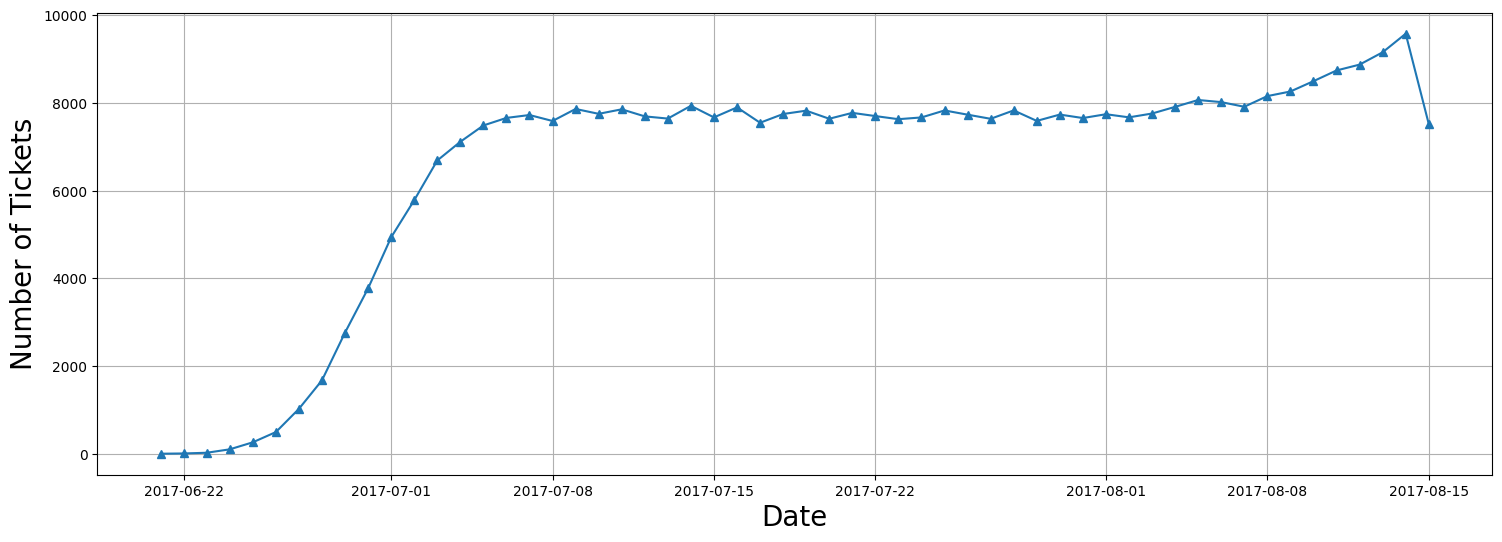

In [20]:
tickets = pd.read_sql_query("""select * from tickets inner join bookings 
                            on tickets.book_ref = bookings.book_ref""", connection )

# change the datetime
tickets['book_date'] = pd.to_datetime(tickets['book_date'])
tickets['date'] = tickets['book_date'].dt.date

plt.figure(figsize= (18,6))
x = tickets.groupby('date')[['date']].count()
plt.plot(x.index, x['date'], marker='^')
plt.xlabel("Date", fontsize=20)
plt.ylabel("Number of Tickets", fontsize=20)
plt.grid('b')
plt.show()

#### Plot for Total Amount

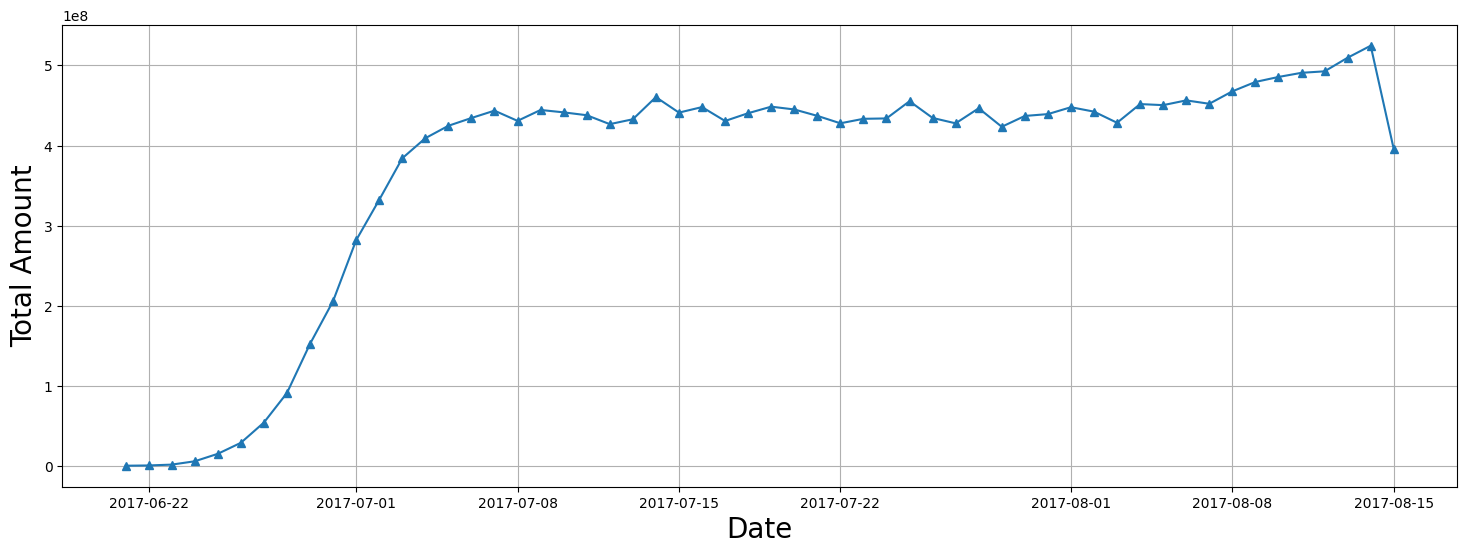

In [21]:
bookings = pd.read_sql_query("""select * from bookings""", connection )

# change the datetime
bookings['book_date'] = pd.to_datetime(bookings['book_date'])
bookings['date'] = bookings['book_date'].dt.date
plt.figure(figsize=(18,6))
x = bookings.groupby('date') [['total_amount']].sum()
plt.plot(x.index, x['total_amount'], marker='^')
plt.xlabel("Date", fontsize=20)
plt.ylabel("Total Amount", fontsize=20)
plt.grid('b')
plt.show()

#### Calculate the average charges for each aircraft with different fare conditions

In [22]:
flights.head(2)

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
0,1185,PG0134,2017-09-10 09:50:00+03,2017-09-10 14:55:00+03,DME,BTK,Scheduled,319,\N,\N
1,3979,PG0052,2017-08-25 14:50:00+03,2017-08-25 17:35:00+03,VKO,HMA,Scheduled,CR2,\N,\N


In [23]:
ticket_flights.head(2)

,ticket_no,flight_id,fare_conditions,amount
0,0005432159776,30625,Business,42100
1,0005435212351,30625,Business,42100


In [24]:
df = pd.read_sql_query("""Select fare_conditions,aircraft_code, avg(amount) as Average_Amount from  ticket_flights join flights 
                        on ticket_flights.flight_id = flights.flight_id
                        group by aircraft_code, fare_conditions""",connection)

<Axes: xlabel='aircraft_code', ylabel='Average_Amount'>

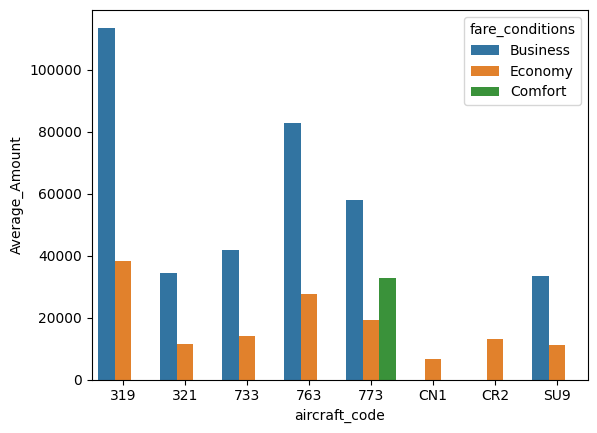

In [26]:
sns.barplot(data=df,x='aircraft_code',y='Average_Amount',hue='fare_conditions')

### Analyzing Occupancy Rate

##### For each aircraft, calculate the total revenue per year and the average revenue per ticket.

In [27]:
pd.read_sql_query("""select aircraft_code, ticket_count, total_revenue, total_revenue/ticket_count  as Avg_revenue_per_ticket from 
(select aircraft_code, count(*) as ticket_count, sum(amount) as total_revenue from ticket_flights 
                    join flights on ticket_flights.flight_id = flights.flight_id group by aircraft_code)""",connection)


,aircraft_code,ticket_count,total_revenue,Avg_revenue_per_ticket
0,319,52853,2706163100,51201
1,321,107129,1638164100,15291
2,733,86102,1426552100,16568
3,763,124774,4371277100,35033
4,773,144376,3431205500,23765
5,CN1,14672,96373800,6568
6,CR2,150122,1982760500,13207
7,SU9,365698,5114484700,13985


#### Calculate the average occupancy per aircraft. 

##### Occupancy Rate -> seat_counts / total_seats

In [28]:
occupancy_rate = pd.read_sql_query(""" select a.aircraft_code, avg(a.seat_counts) as bookeed_seats, b.num_seats, avg(a.seat_counts)/b.num_seats as occupancy_rate from 
(select aircraft_code, flights.flight_id, count(*) as seat_counts from boarding_passes inner join flights
                    on boarding_passes.flight_id=  flights.flight_id
                    group by aircraft_code,flights.flight_id ) as a
                    inner join 
                    (select aircraft_code, count(*) as num_seats from seats group by aircraft_code) as b
                    on a.aircraft_code = b.aircraft_code group by a.aircraft_code""", connection)

occupancy_rate

,aircraft_code,bookeed_seats,num_seats,occupancy_rate
0,319,53.583181,116,0.461924
1,321,88.809231,170,0.522407
2,733,80.255462,130,0.617350
3,763,113.937294,222,0.513231
4,773,264.925806,402,0.659019
5,CN1,6.004431,12,0.500369
6,CR2,21.482847,50,0.429657
7,SU9,56.812113,97,0.585692


#### Calculate by how much the total amount turnover colud increase by giving all aircraft a 10% higher occupancy rate.

In [29]:
occupancy_rate['Inc occupancy rate'] = occupancy_rate['occupancy_rate'] + occupancy_rate['occupancy_rate']*0.1
occupancy_rate

,aircraft_code,bookeed_seats,num_seats,occupancy_rate,Inc occupancy rate
0,319,53.583181,116,0.461924,0.508116
1,321,88.809231,170,0.522407,0.574648
2,733,80.255462,130,0.617350,0.679085
3,763,113.937294,222,0.513231,0.564554
4,773,264.925806,402,0.659019,0.724921
5,CN1,6.004431,12,0.500369,0.550406
6,CR2,21.482847,50,0.429657,0.472623
7,SU9,56.812113,97,0.585692,0.644261


In [30]:
pd.set_option("display.float_format",str)  ## means->Pandas me float numbers ko string format me display karna, taaki scientific notation ya extra decimals na dikhen.

In [31]:
total_revenue = pd.read_sql_query("""select aircraft_code, sum(amount) as total_revenue from ticket_flights
                                        join flights on ticket_flights.flight_id = flights.flight_id group by aircraft_code""",connection)

occupancy_rate['Inc Total Amount Turnover'] = (total_revenue['total_revenue']/occupancy_rate['occupancy_rate']*occupancy_rate['Inc occupancy rate'])
occupancy_rate

,aircraft_code,bookeed_seats,num_seats,occupancy_rate,Inc occupancy rate,Inc Total Amount Turnover
0,319,53.58318098720292,116,0.46192397402761143,0.5081163714303726,2976779410.0
1,321,88.80923076923077,170,0.5224072398190045,0.574647963800905,1801980510.0
2,733,80.25546218487395,130,0.617349709114415,0.6790846800258565,1569207310.0000002
3,763,113.93729372937294,222,0.5132310528350132,0.5645541581185146,4808404810.0
4,773,264.9258064516129,402,0.659019419033863,0.7249213609372492,3774326050.0
5,CN1,6.004431314623338,12,0.5003692762186115,0.5504062038404727,106011180.00000001
6,CR2,21.48284690220174,50,0.42965693804403476,0.4726226318484382,2181036550.0
7,SU9,56.81211267605634,97,0.5856918832583128,0.644261071584144,5625933169.999999


### Conclusion

To summarize, analyzing revenue data such as total revenue per year, average revenue per ticket, and average occupancy per aircraft is critical for airlines seeking to maximize profitability. Airlines can find areas for improvement and modify their pricing and route plans as a result of assessing these indicators. A greater occupancy rate is one important feature that can enhance profitability since it allows airlines to maximize revenue while minimizing costs associated with vacant seats. The airline should revise the price for each aircraft as the lower price and high price is also the factor that people are not buying tickets from those aircrafts. They should decide the reasonable price according to the condition and facility of the aircraft and it should not be very cheap or high.

Furthermore, boosting occupancy rates should not come at the price of consumer happiness or safety. Airlines must strike a balance between the necessity for profit and the significance of delivering high-quality service and upholding safety regulations. Airlines may achieve long-term success in a highly competitive business by adopting a data-driven strategy to revenue analysis and optimisation.